In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [13]:
df=pd.read_json('ticket_trend.json')
df.head(5)

,Ticket_Type,Number_of_Tickets,Date
0,Received,160,2019-01-01
1,Received,184,2019-02-01
2,Received,241,2019-03-01
3,Received,149,2019-04-01
4,Received,180,2019-05-01


In [17]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=pd.DatetimeIndex(df['Date']).month_name()
df.head(5)


,Ticket_Type,Number_of_Tickets,Date,Month
0,Received,160,2019-01-01,January
1,Received,184,2019-02-01,February
2,Received,241,2019-03-01,March
3,Received,149,2019-04-01,April
4,Received,180,2019-05-01,May


In [40]:
df['Month'].iloc[-1]

'December'

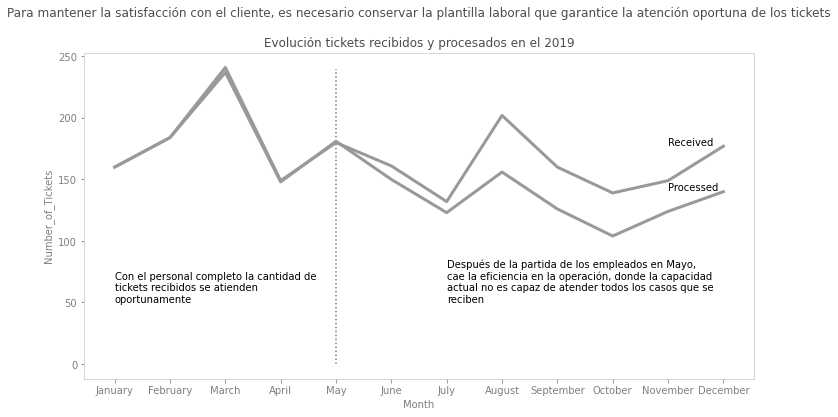

In [83]:
Unicos=df.Ticket_Type.unique()
fig = plt.gcf()
fig.set_size_inches(12, 6, forward=True)
ax = plt.axes()


for i in Unicos: 
 
 NewDF=df.loc[df['Ticket_Type'] == i]
 plt.plot(NewDF['Month'],NewDF['Number_of_Tickets'], label=i, color='0.6', linewidth=3)
 plt.text(NewDF['Month'].iloc[-2], NewDF['Number_of_Tickets'].iloc[-1]+1, i)

plt.vlines(x='May',ymin=0, ymax=240, linestyles='dotted', colors='0.5' )
plt.ylabel('Number_of_Tickets', fontdict={'color':'0.5'});
plt.xlabel('Month',fontdict={'color':'0.5'});
plt.title('Para mantener la satisfacción con el cliente, es necesario conservar la plantilla laboral que garantice la atención oportuna de los tickets\n\nEvolución tickets recibidos y procesados en el 2019', fontdict={'color':'0.3'});
#plt.title('Aircraft Damage by Makerdadadads', fontdict={'color':'0.5'});

ax.spines['bottom'].set_color('0.8')
ax.spines['top'].set_color('0.8')
ax.spines['right'].set_color('0.8')
ax.spines['left'].set_color('0.8')
ax.tick_params(axis='x', colors='0.5')
ax.tick_params(axis='y', colors='0.5')

plt.text('July', 50, 'Después de la partida de los empleados en Mayo,\n\
cae la eficiencia en la operación, donde la capacidad\n\
actual no es capaz de atender todos los casos que se \n\
reciben')

plt.text('January', 50, 'Con el personal completo la cantidad de\n\
tickets recibidos se atienden\n\
oportunamente')

plt.show()
